# Exploratory Data Analysis (EDA) for House Price <br>
**Hijir Della Wirasti** <br>
Business Intelligence <br>
Dibimbing <br>
Batch 13

Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Library visualisasi
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Mengimpor data dari file sample_submission.csv
df_sample = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQsDgvkiBOrvwWuJyVF2-xJ5J1YpQ56-Y1UDm1oKE2UaAys0gCJIa_SzzJEA4YBRqgvjUAFI8osxUiO/pub?output=csv')
df_sample.head()

Id    SalePrice
0  1461  169277.0525
1  1462  187758.3940
2  1463  183583.6836
3  1464  179317.4775
4  1465  150730.0800

# Data Preprocessing 1

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [ ]:
# Mengecek jumlah missing values per kolom
missing_values = df_sample.isnull().sum()

# Menampilkan kolom dengan missing values beserta persentasenya
missing_percent = (missing_values / len(df_sample)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
}).sort_values(by='Missing Values', ascending=False)

print(missing_summary)

           Missing Values  Percentage
Id                      0         0.0
SalePrice               0         0.0


In [ ]:
# Mengecek jumlah data duplikat
duplicate_count = df_sample.duplicated().sum()

print(f"Jumlah data duplikat: {duplicate_count}")

# Melihat data duplikat
if duplicate_count > 0:
    duplicate_data = df_sample[df_sample.duplicated()]
    print("Data duplikat:")
    print(duplicate_data)

Jumlah data duplikat: 0


# Data Profiling dan Visualisasi

### Statistika deskriptif untuk variabel harga rumah (Column Name : SalePrice)


## Descriptive Statistics

In [ ]:
df_sample.describe()

Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  179183.918243
std     421.321334   16518.303051
min    1461.000000  135751.318900
25%    1825.500000  168703.011200
50%    2190.000000  179208.665700
75%    2554.500000  186789.409400
max    2919.000000  281643.976100

In [ ]:
#Ukuran Pemusatan
sale_price = df_sample['SalePrice']
print("Ukuran Pemusatan:")

#Mean, median, Mode, Q1, Q2, Q3, P90, P99
print('Mean:',sale_price.mean())
print('Mediaan:',sale_price.median())
print('Mode:',sale_price.mode()[0])

#Quartile
print('Q1:',sale_price.quantile(0.25))
print('Q3:',sale_price.quantile(0.75))

#Percentile
print('P90:',sale_price.quantile(0.90))
print('P99:',sale_price.quantile(0.99))

#Ukuran Penyebaran
print("\nUkuran Penyebaran:")

#std & variance
print('Standard Deviation:',sale_price.std())
print('Variance:',sale_price.var())

#Interquartile Range
Q1 = sale_price.quantile(0.25)
Q3 = sale_price.quantile(0.75)
print('Interquantile Range:', Q3-Q1)

#Range
min_value = sale_price.min()
max_value = sale_price.max()
print('Range:', max_value-min_value)

Ukuran Pemusatan:
Mean: 179183.91824318026
Mediaan: 179208.6657
Mode: 174126.2972
Q1: 168703.0112
Q3: 186789.4094
P90: 197624.55516000002
P99: 228151.734888

Ukuran Penyebaran:
Standard Deviation: 16518.303050626702
Variance: 272854335.67234343
Interquantile Range: 18086.398199999996
Range: 145892.65720000002


**Interpretasi** <br>
Berdasarkan data harga rumah, ukuran pemusatan menunjukkan bahwa rata-rata harga rumah **(mean)** adalah sekitar 179,184 dollar, yang sangat dekat dengan median harga ($179,209), menandakan distribusi harga yang relatif simetris. **Mode**, yaitu harga rumah yang paling sering muncul, sedikit lebih rendah di 174,126 dollar, menunjukkan bahwa ada beberapa harga yang lebih umum terjadi, meskipun distribusi umumnya simetris. <br>

**Quartiles (Q1 dan Q3)** menunjukkan bahwa 25% dari rumah dijual dengan harga di bawah 168,703 dollar, sedangkan 75% dijual dengan harga di bawah 186,789 dollar, dengan rentang antar kuartil (IQR) sebesar 18,086 dollar, menandakan variasi harga di segmen tengah pasar. **Percentiles (P90 dan P99)** menunjukkan bahwa 10% dari rumah termahal dijual dengan harga di bawah 197,625 dollar, dan 1% dari rumah termahal dijual dengan harga di bawah 228,152 dollar, menyoroti harga-harga yang lebih tinggi dalam distribusi. <br>

Ukuran penyebaran menunjukkan **deviasi standar** sebesar 16,518 dollar dan **variansi** sebesar 272854335,6, menunjukkan variasi harga yang signifikan di sekitar rata-rata. Rentang harga **(Range)**, yang mencapai 145,893 dollar, menunjukkan perbedaan besar antara harga rumah terendah dan tertinggi yang terjual. Secara keseluruhan, meskipun ada variasi yang signifikan dalam harga rumah, data menunjukkan bahwa distribusi harga cenderung stabil di sekitar nilai rata-rata dengan adanya rentang harga yang luas.

## Statistika deskriptif untuk variabel harga rumah dengan beberapa variable

In [ ]:
# Mengimpor data dari file train.csv
df_train = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQHmbuiq3SmPDQcabCf-Hud3_kPh3NBBQDccYrTLCE0Nvjfg2d3HEKOeSQcGtYhWiSFMEMD5wUEJ3PV/pub?output=csv')
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Memastikan kolom yang diperlukan ada
df_train[['SalePrice', 'YrSold']].head()

SalePrice  YrSold
0     208500    2008
1     181500    2007
2     223500    2008
3     140000    2006
4     250000    2008

In [ ]:
df_train.groupby('YrSold')['SalePrice'].describe()

count           mean           std      min       25%       50%  \
YrSold                                                                    
2006    314.0  182549.458599  79426.838855  35311.0  131375.0  163995.0   
2007    329.0  186063.151976  85768.171410  39300.0  129900.0  167000.0   
2008    304.0  177360.838816  69735.610685  40000.0  131250.0  164000.0   
2009    338.0  179432.103550  80879.237311  34900.0  125250.0  162000.0   
2010    175.0  177393.674286  80451.280085  55000.0  128100.0  155000.0   

             75%       max  
YrSold                      
2006    218782.5  625000.0  
2007    219500.0  755000.0  
2008    207000.0  446261.0  
2009    212750.0  582933.0  
2010    213250.0  611657.0

In [ ]:
# Menghitung ukuran pemusatan berdasarkan tahun
stat_central = df_train.groupby('YrSold')['SalePrice'].agg(
    Mean='mean',
    Median='median',
    Mode=lambda x: x.mode()[0],
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75),
    P90=lambda x: x.quantile(0.90),
    P99=lambda x: x.quantile(0.99)
).reset_index()

# Menampilkan ukuran pemusatan
print("Ukuran Pemusatan Berdasarkan Tahun Penjualan:")
print(stat_central)

Ukuran Pemusatan Berdasarkan Tahun Penjualan:
   YrSold           Mean    Median    Mode        Q1        Q3       P90  \
0    2006  182549.458599  163995.0  140000  131375.0  218782.5  275000.0   
1    2007  186063.151976  167000.0  129000  129900.0  219500.0  290000.0   
2    2008  177360.838816  164000.0  140000  131250.0  207000.0  271000.0   
3    2009  179432.103550  162000.0  110000  125250.0  212750.0  275900.0   
4    2010  177393.674286  155000.0  128000  128100.0  213250.0  264900.0   

         P99  
0  461591.40  
1  437200.00  
2  394553.49  
3  472771.50  
4  443280.00  


In [ ]:
# Menghitung ukuran penyebaran berdasarkan tahun
stat_dispersion = df_train.groupby('YrSold')['SalePrice'].agg(
    StdDev='std',
    Variance='var',
    IQR=lambda x: x.quantile(0.75) - x.quantile(0.25),
    Range=lambda x: x.max() - x.min()
).reset_index()

# Menampilkan ukuran penyebaran
print("\nUkuran Penyebaran Berdasarkan Tahun Penjualan:")
print(stat_dispersion)



Ukuran Penyebaran Berdasarkan Tahun Penjualan:
   YrSold        StdDev      Variance      IQR   Range
0    2006  79426.838855  6.308623e+09  87407.5  589689
1    2007  85768.171410  7.356179e+09  89600.0  715700
2    2008  69735.610685  4.863055e+09  75750.0  406261
3    2009  80879.237311  6.541451e+09  87500.0  548033
4    2010  80451.280085  6.472408e+09  85150.0  556657


**Interpretasi** <br>

Data menunjukkan bahwa rata-rata harga rumah relatif stabil dari tahun ke tahun dengan sedikit fluktuasi, dengan tahun 2007 mencatat rata-rata tertinggi dan tahun 2008 serta 2010 sedikit lebih rendah. Median harga rumah menunjukkan penurunan bertahap dari 2006 hingga 2010, sementara mode harga rumah berubah setiap tahun, mencerminkan perbedaan dalam segmen pasar. Quartiles (Q1 dan Q3) serta percentiles (P90 dan P99) menunjukkan variasi dalam rentang harga rumah, dengan harga ekstrem (P90 dan P99) menunjukkan perbedaan besar dari tahun ke tahun. <br>

Tahun 2010 menunjukkan penurunan pada median dan mean harga penjualan, yang mungkin menunjukkan penurunan harga di pasar rumah. Namun, ukuran penyebaran seperti standar deviasi dan IQR tetap tinggi, yang menunjukkan bahwa meskipun ada penurunan harga rata-rata, variasi harga tetap signifikan. <br>

Data ini bisa membantu tim bisnis dalam memahami tren harga properti dari tahun ke tahun dan menilai strategi penjualan atau investasi yang tepat berdasarkan analisis harga di masa lalu. <br>

**Ukuran Pemusatan Berdasarkan Tahun Penjualan** <br>

**1. Mean (Rata-rata):** Rata-rata harga rumah relatif stabil dari tahun ke tahun dengan sedikit fluktuasi. Tahun 2007 menunjukkan rata-rata harga rumah tertinggi, sedangkan tahun 2008 dan 2010 menunjukkan rata-rata harga yang sedikit lebih rendah. <br>

**2. Median (Nilai Tengah):** Median menggambarkan titik tengah dari harga rumah yang terjual, yang lebih tahan terhadap outlier (harga yang sangat tinggi atau sangat rendah) dibandingkan dengan mean. Nilai median ini sedikit lebih rendah dari mean, menunjukkan distribusi yang mungkin sedikit condong ke harga yang lebih rendah. Median terendah tercatat pada tahun 2010 ($155,000), yang bisa menunjukkan penurunan di segmen pasar menengah pada tahun tersebut. <br>

**3. Mode (Nilai yang Paling Sering Muncul):** Mode mewakili harga rumah yang paling sering dijual setiap tahun. Misalnya, pada tahun 2006, mode adalah $140,000, yang mungkin menunjukkan banyak rumah terjual di harga tersebut. Perbedaan besar antara mean, median, dan mode dapat menunjukkan adanya beberapa penjualan dengan harga sangat rendah atau sangat tinggi yang memengaruhi distribusi harga. <br>

**4. Q1 dan Q3 (Kuartil Pertama dan Ketiga):** Q1 (25th percentile) dan Q3 (75th percentile) menggambarkan batas bawah dan atas dari rentang harga penjualan untuk 50% rumah di tengah distribusi. Pada tahun 2007, Q1 tercatat 129,900 USD dan Q3 sebesar 219,500 USD, yang berarti separuh rumah terjual dengan harga antara angka tersebut. Variasi antara Q1 dan Q3 tetap cukup konsisten, menunjukkan stabilitas dalam harga penjualan di segmen tengah pasar. <br>

**5. P90 dan P99 (Percentile ke-90 dan ke-99):** P90 dan P99 mewakili harga penjualan di ujung atas distribusi, dengan 10% dan 1% rumah termahal di setiap tahun. Tahun 2009 mencatat P99 tertinggi sebesar $472,771.50, menunjukkan ada beberapa penjualan rumah dengan harga sangat tinggi pada tahun itu. Ini mungkin mencerminkan penjualan properti kelas atas yang lebih signifikan pada tahun tersebut. <br>


**Ukuran Penyebaran Berdasarkan Tahun Penjualan** <br>

**1. StdDev (Standar Deviasi):** Standar deviasi mengukur seberapa tersebar harga penjualan rumah di sekitar mean. Pada tahun 2007, standar deviasi tertinggi tercatat sebesar $85,768, menunjukkan variasi yang lebih besar dalam harga rumah yang terjual tahun itu. Ini dapat mengindikasikan adanya segmen pasar dengan harga sangat tinggi atau sangat rendah. <br>

**2. Variance (Variansi):** Variansi adalah kuadrat dari standar deviasi dan memberikan gambaran tentang penyebaran harga yang lebih umum. Nilai variansi tertinggi juga tercatat pada tahun 2007, memperkuat indikasi bahwa variasi harga rumah terbesar terjadi pada tahun ini. <br>

**3. IQR (Interquartile Range):** IQR mengukur rentang harga antara Q1 dan Q3, memberikan gambaran tentang rentang harga di segmen tengah pasar. IQR paling besar adalah $89,600 pada tahun 2007, yang menunjukkan adanya variasi harga yang lebih besar di segmen tengah pada tahun tersebut. <br>

**4. Range (Rentang):** Rentang menunjukkan perbedaan antara harga penjualan tertinggi dan terendah setiap tahun. Tahun 2007 mencatat rentang tertinggi sebesar $715,700, yang mengindikasikan perbedaan besar antara rumah termurah dan termahal yang terjual pada tahun itu. <br>

 ## Distribusi harga rumah <br>


### Histogram

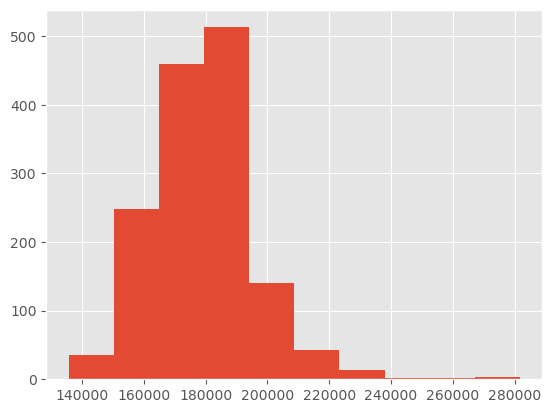

In [ ]:
plt.hist(df_sample['SalePrice'])
plt.show()

### Vertical Boxplot

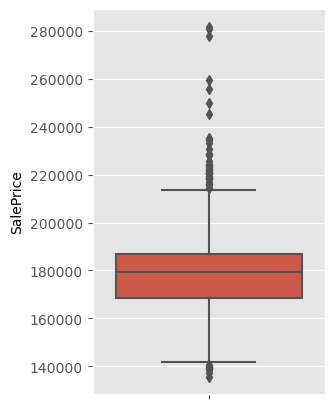

In [ ]:
plt.figure(figsize = (3,5))
sns.boxplot(y='SalePrice',data = df_sample)
plt.show()

In [ ]:
df_sample.describe().transpose()[['mean','50%']]

mean            50%
Id           2190.000000    2190.000000
SalePrice  179183.918243  179208.665698

**Analisa** <br>
Dari histogram dan boxplot yang disediakan:<br>

**Histogram (SalePrice):** <br>
Histogram menunjukkan distribusi harga rumah dengan mayoritas harga berkisar antara 140,000 dolar hingga $200,000. Distribusi ini miring ke kanan (right-skewed), yang menunjukkan adanya beberapa harga yang jauh lebih tinggi dari mayoritas.<br>

**Boxplot (SalePrice):** <br>
- Boxplot menggambarkan distribusi SalePrice dengan lebih jelas terkait penyebaran dan outlier. Rata-rata harga rumah berada di sekitar $180,000 (ditunjukkan oleh garis tengah kotak). <br>

- Ada beberapa outlier yang jauh lebih tinggi, dengan harga rumah di atas  240,000 dollar hingga mendekati $280,000. <br><br>

**Interpretasi**<br>
Dalam analisa distribusi harga rumah (SalePrice), sebaiknya digunakan median daripada mean. Berikut adalah alasannya:<br>
**Robustness terhadap Outlier:**<br>
- Median lebih tahan terhadap outlier, yang mana adalah harga rumah yang sangat tinggi dalam kasus ini. Mean akan terpengaruh oleh nilai-nilai ekstrem tersebut dan memberikan gambaran yang mungkin tidak mewakili mayoritas data. Sebaiknya menggunakan median karena robust terhadap outlier. Untuk input data null juga disarankan menggunakan median karena mean sangat terpengaruh oleh outlier. <br>
- Sebagai contoh, jika mayoritas rumah memiliki harga di sekitar $180,000 tetapi ada beberapa rumah yang sangat mahal, mean akan menjadi lebih tinggi, memberikan ilusi bahwa harga rata-rata lebih tinggi dari kenyataan.<br>
**Distribusi Skewed:**<br>
Karena distribusi data miring ke kanan, median akan memberikan representasi yang lebih akurat dari harga rumah tengah dibandingkan mean, yang cenderung tertarik ke arah harga yang lebih tinggi karena outlier.<br><br>

**Kesimpulan**<br>
- Untuk analisa distribusi harga rumah ini, median adalah pilihan yang lebih tepat karena memberikan gambaran yang lebih akurat tentang harga rumah tengah tanpa terdistorsi oleh beberapa harga rumah yang sangat tinggi.<br>
- Ini penting bagi tim bisnis karena pemahaman yang lebih akurat tentang harga rumah akan membantu dalam pengambilan keputusan terkait strategi harga, evaluasi pasar, dan perencanaan keuangan.<br>


# Data Preprocessing 2

              Missing Values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageYrBlt               81    5.547945
GarageCond                81    5.547945
GarageType                81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
BsmtFinType2              38    2.602740
BsmtExposure              38    2.602740
BsmtQual                  37    2.534247
BsmtCond                  37    2.534247
BsmtFinType1              37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493


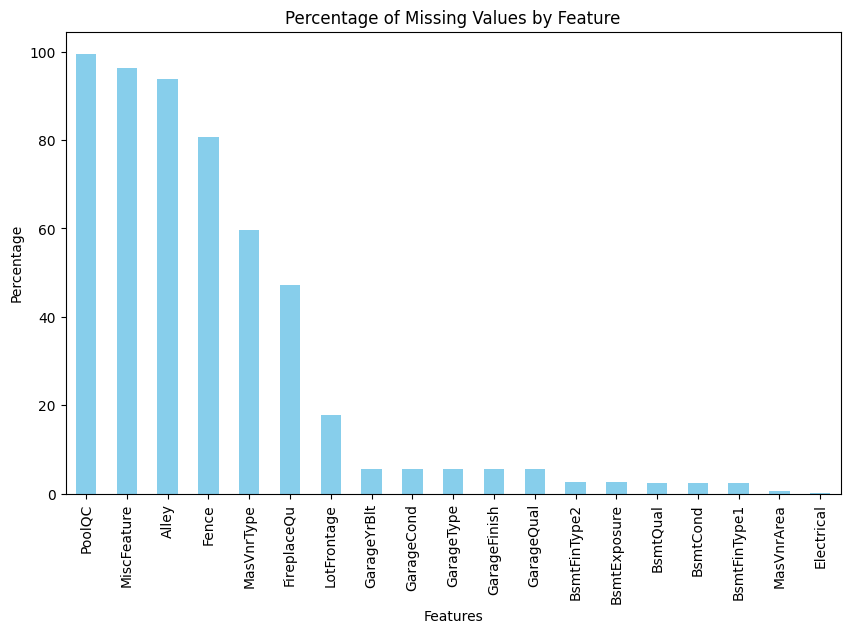

In [ ]:
# Calculate missing values and percentages
missing_values = df_train.isnull().sum()
missing_percent = (missing_values / len(df_train)) * 100

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
}).sort_values(by='Missing Values', ascending=False)

# Filter for columns with missing values
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

# Display the missing summary
print(missing_summary)

# Visualize missing values
plt.figure(figsize=(10, 6))
missing_summary['Percentage'].plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

### Langkah-Langkah Penanganan Missing Values

Berikut adalah langkah-langkah untuk menangani missing values berdasarkan jumlah dan persentasenya:

---

### **1. Evaluasi Kolom dengan Banyak Missing Values**
Kolom dengan persentase missing values yang sangat tinggi (>50%) sering kali tidak signifikan dalam analisis, sehingga perlu dipertimbangkan:
- **Menghapus kolom** jika kontribusinya tidak signifikan.
- **Mengisi missing values** jika kolom tersebut memiliki relevansi penting berdasarkan pengetahuan domain.

#### **Kolom dengan Banyak Missing Values:**
1. `PoolQC` (99.52% missing)
2. `MiscFeature` (96.30% missing)
3. `Alley` (93.77% missing)
4. `Fence` (80.75% missing)

**Saran**:
- Jika kolom ini tidak penting untuk analisis atau modeling, lebih baik dihapus.
- Jika kolom ini relevan, pertimbangkan mengisi dengan kategori khusus seperti `'None'` untuk kategori atau 0 untuk numerik.

---

### **2. Strategi Penanganan Missing Values Berdasarkan Persentase**

#### **a. Columns with <5% Missing**
- Missing values diimputasi menggunakan **median** untuk menghindari bias akibat outlier.
- Contoh kolom: `GarageYrBlt`, `MasVnrArea`, `Electrical`.

#### **b. Columns with 5–20% Missing**
- Missing values tetap diimputasi menggunakan **median**, karena jumlah yang hilang masih signifikan tetapi fitur bisa tetap berguna.
- Contoh kolom: `LotFrontage`.

#### **c. Columns with >20% Missing**
- Kolom dengan missing values lebih dari 20% dihapus untuk mengurangi potensi bias atau kesalahan analisis.
- Contoh: `PoolQC`, `MiscFeature`, `Alley`, `Fence`.

---




In [ ]:
# Copy the original dataset to a new variable
df_cleaned = df_train.copy()

# Separate numerical and categorical columns
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Missing values handling

## a. Columns with <5% missing: Impute using median (Numerical) or mode (Categorical)
columns_less_5 = missing_summary[(missing_summary['Percentage'] < 5)].index
for col in columns_less_5:
    if col in numerical_columns:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
    elif col in categorical_columns:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

## b. Columns with 5–20% missing: Impute using median (Numerical) or mode (Categorical)
columns_5_to_20 = missing_summary[(missing_summary['Percentage'] >= 5) &
                                  (missing_summary['Percentage'] <= 20)].index
for col in columns_5_to_20:
    if col in numerical_columns:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
    elif col in categorical_columns:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

## c. Columns with >20% missing: Drop columns
columns_more_20 = missing_summary[missing_summary['Percentage'] > 20].index
df_cleaned.drop(columns=columns_more_20, inplace=True)

# Validate that missing values are handled
print("Remaining Missing Values:", df_cleaned.isnull().sum().sum())

# Optional: Display the updated dataset info
print("Dataset after handling missing values:")
print(df_cleaned.info())


Remaining Missing Values: 0
Dataset after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null 

In [ ]:
    num_duplicates = df_cleaned.duplicated().sum()
    print(f"Number of duplicate rows: {num_duplicates}")

    # Save duplicate rows in a new DataFrame (if any)
    dp_duplicates = df_cleaned[df_cleaned.duplicated()] if num_duplicates > 0 else None

    # Remove duplicates and drop the 'Id' column, then save as a new DataFrame
    dp = df_cleaned.drop_duplicates().drop(columns=['Id'], errors='ignore')

    # Display results
    print(f"Rows after removing duplicates and dropping 'Id': {len(dp)}")

Number of duplicate rows: 0
Rows after removing duplicates and dropping 'Id': 1460


In [ ]:
dp.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 74 columns]

# EDA

In [ ]:
# Pisahkan kolom numerikal dan kategorikal
numerical_columns = dp.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = dp.select_dtypes(include=['object']).columns

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)


Numerical Columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical Columns: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating

## 2. Univariate Analysis

### a. Analisis Kolom Numerikal

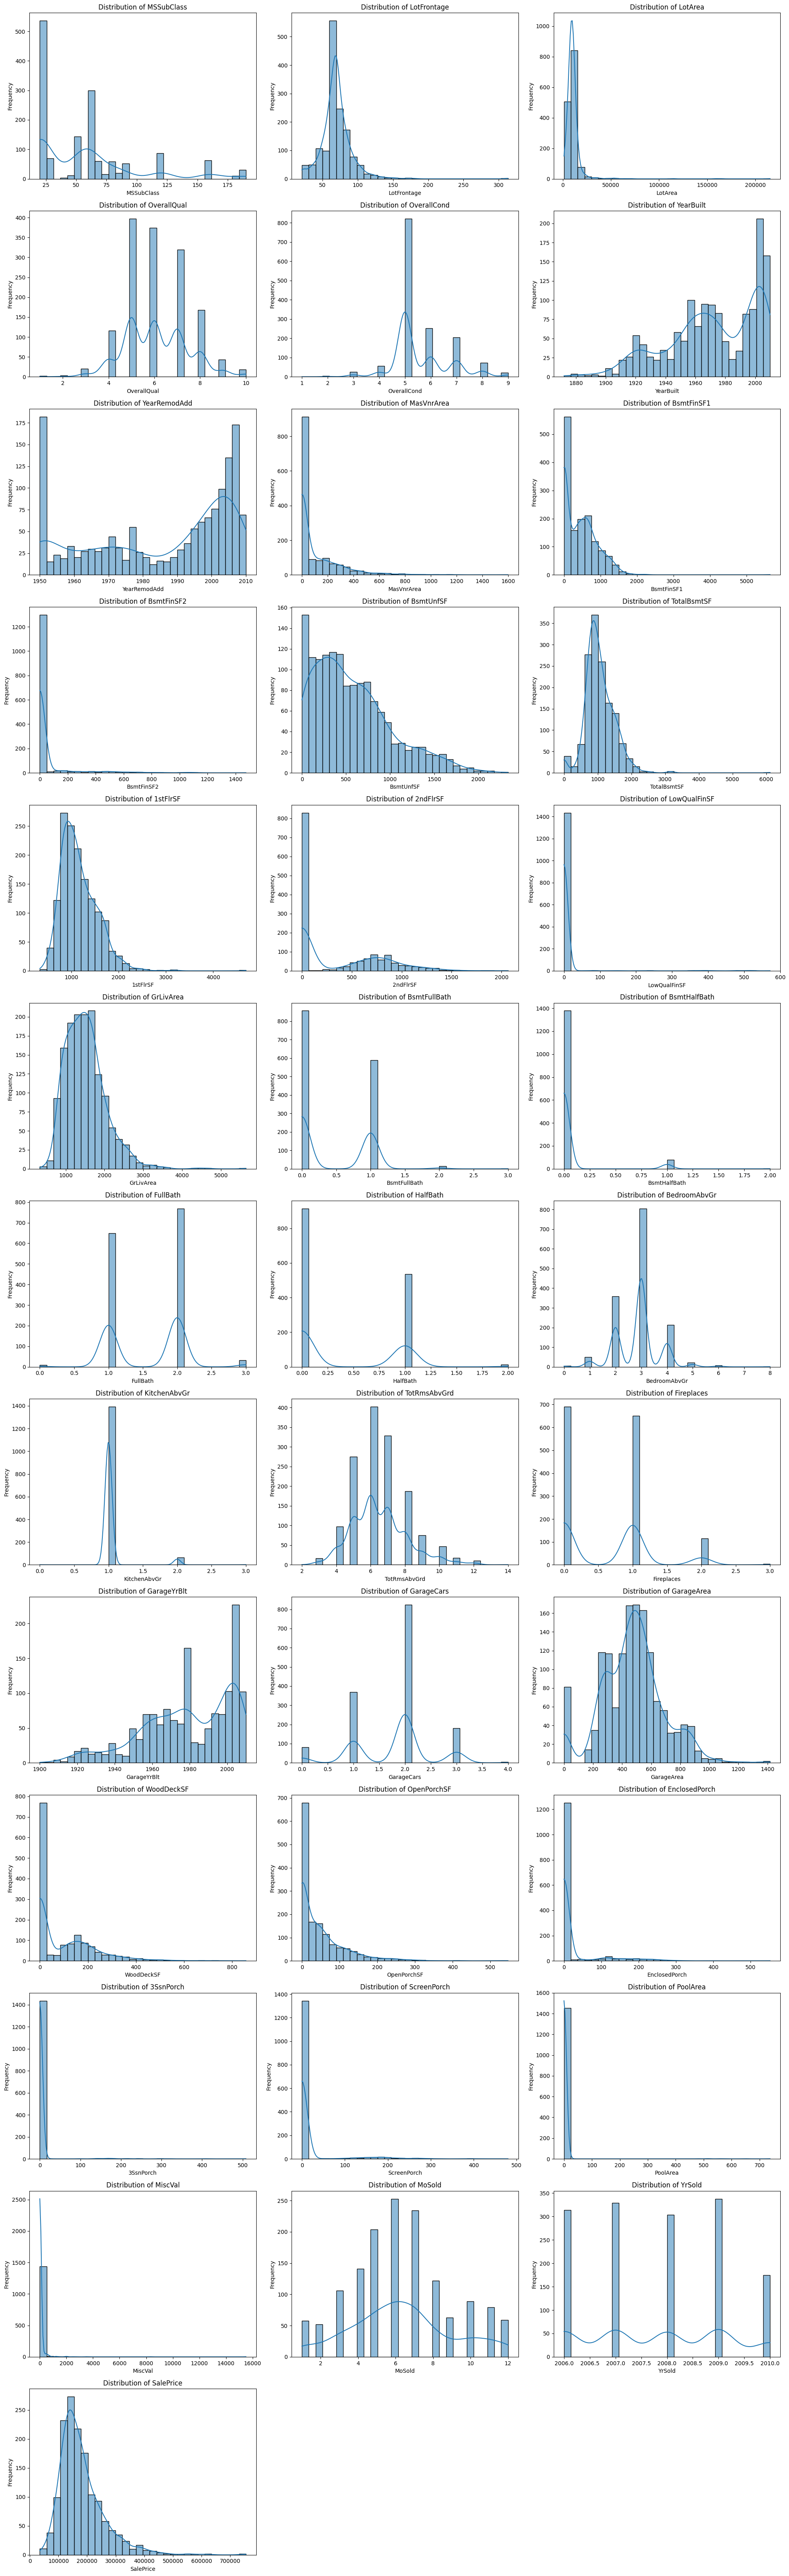

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan jumlah baris dan kolom untuk grid
num_cols = len(numerical_columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # 3 grafik per baris

# Buat subplots
fig, axes = plt.subplots(rows, 3, figsize=(20, rows * 5))  # Atur ukuran grid
axes = axes.flatten()  # Ratakan axes untuk iterasi

# Plot setiap kolom numerikal
for i, col in enumerate(numerical_columns):
    sns.histplot(dp[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hapus sumbu kosong jika jumlah kolom tidak habis dibagi 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Atur layout agar tidak overlapping
plt.tight_layout()
plt.show()


Dari grafik distribusi untuk setiap kolom numerikal, berikut adalah beberapa insight yang bisa diambil:

#### **Insight Umum**
1. **Distribusi Target Variable (`SalePrice`)**:
   - Distribusi `SalePrice` terlihat **right-skewed**, artinya sebagian besar rumah memiliki harga di bawah rata-rata, sementara sedikit rumah memiliki harga yang sangat tinggi. Ini menunjukkan adanya **outliers** atau properti premium.

2. **`LotArea` (Ukuran Lahan)**:
   - Distribusinya juga sangat **right-skewed**, menunjukkan mayoritas properti memiliki lahan kecil hingga sedang, sementara hanya sedikit yang memiliki ukuran lahan besar. Properti dengan ukuran lahan besar mungkin menjadi outlier yang memengaruhi rata-rata harga.

3. **`YearBuilt` (Tahun Dibangun)**:
   - Mayoritas properti dibangun antara tahun **1970–2010**, dengan peningkatan signifikan pada tahun 2000-an. Ini bisa menunjukkan bahwa properti yang lebih baru memiliki pengaruh signifikan pada harga properti.

4. **`GrLivArea` (Total Luas Area yang Layak Huni)**:
   - Distribusi terlihat mirip dengan `SalePrice`, **right-skewed**, menunjukkan bahwa properti dengan luas area yang lebih besar cenderung memiliki harga lebih tinggi. Properti yang jauh lebih besar dari rata-rata perlu diperiksa sebagai potensi outlier.

5. **`GarageArea` (Luas Garasi)**:
   - Sebagian besar rumah memiliki luas garasi standar. Outliers terlihat pada properti dengan garasi yang jauh lebih besar dari rata-rata.

---

### **Insight Berdasarkan Variabel Lain**
1. **`OverallQual` dan `OverallCond` (Kualitas dan Kondisi)**:
   - Variabel ini berbentuk **kategori ordinal** dengan distribusi yang terfokus pada nilai tengah (6-8 untuk `OverallQual` dan 5-7 untuk `OverallCond`). Properti dengan kualitas lebih tinggi (`OverallQual` ≥ 9) cenderung memiliki harga yang lebih tinggi.

2. **`TotalBsmtSF` (Luas Basement)**:
   - Sebagian besar rumah memiliki basement berukuran kecil atau tidak memiliki basement (nol). Rumah dengan basement besar memiliki peluang untuk harga properti yang lebih tinggi.

3. **`GarageCars` (Jumlah Mobil yang Bisa Ditampung Garasi)**:
   - Sebagian besar rumah dapat menampung 2-3 mobil. Garasi yang mampu menampung lebih banyak mobil dapat meningkatkan harga properti.

4. **`MoSold` (Bulan Penjualan)**:
   - Distribusi penjualan tersebar sepanjang tahun, tetapi beberapa bulan seperti musim panas (Mei hingga Agustus) menunjukkan peningkatan aktivitas penjualan. Ini menunjukkan adanya tren musiman di pasar properti.

5. **`YrSold` (Tahun Penjualan)**:
   - Aktivitas penjualan relatif merata setiap tahun. Namun, analisis lebih lanjut diperlukan untuk melihat apakah ada tren harga rumah berdasarkan waktu.

---

### **Business Insight**
1. **Peningkatan Properti untuk Kualitas dan Area**:
   - Properti dengan kualitas yang lebih baik (`OverallQual` dan `GrLivArea`) memiliki harga lebih tinggi. Pengembangan properti dengan fokus pada kualitas konstruksi dan penambahan area layak huni dapat meningkatkan nilai pasar.

2. **Outlier Analysis untuk Premium Properties**:
   - Beberapa fitur seperti `SalePrice`, `LotArea`, dan `GrLivArea` menunjukkan outlier. Analisis lebih dalam terhadap properti ini dapat membantu mengidentifikasi faktor yang membuatnya sangat berharga (lokasi, fasilitas, dll.).

3. **Strategi Penjualan Musiman**:
   - Bulan dengan penjualan tinggi (seperti Mei hingga Agustus) bisa dimanfaatkan untuk strategi pemasaran yang lebih agresif untuk memaksimalkan keuntungan.

4. **Properti Baru Lebih Menarik**:
   - Properti yang dibangun lebih baru (`YearBuilt`) lebih menarik bagi pembeli dan mungkin memiliki harga lebih tinggi. Fokus pada properti baru dapat memberikan keuntungan di pasar.


### b. Analisis Kolom Kategorikal

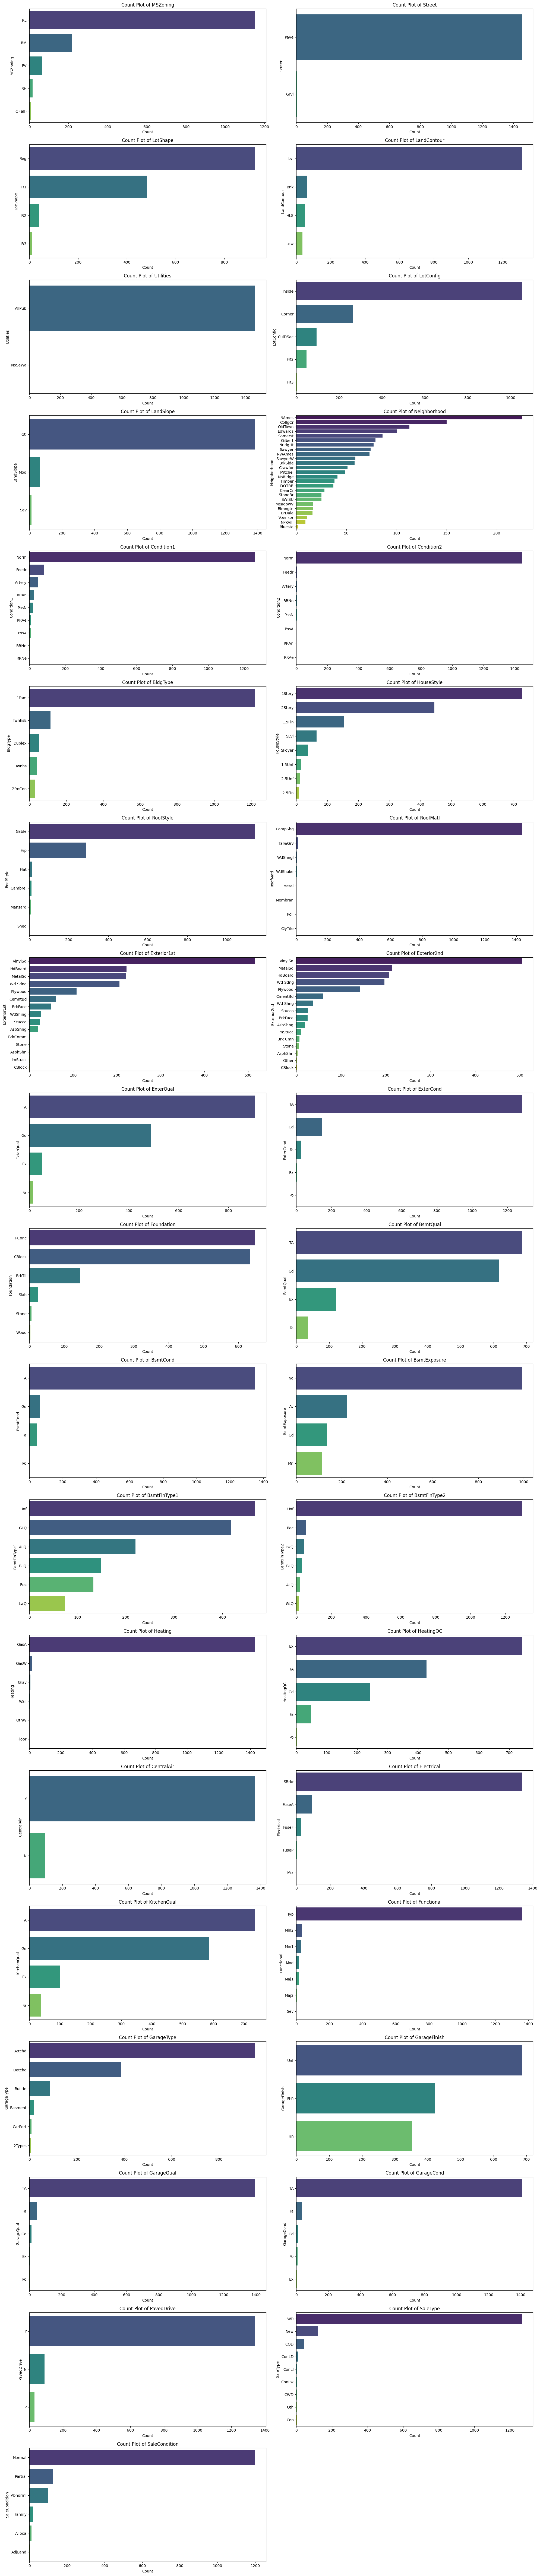

In [ ]:
# Tentukan jumlah baris dan kolom untuk grid
num_cols = len(categorical_columns)
rows = (num_cols // 2) + (num_cols % 2 > 0)  # 2 grafik per baris

# Buat subplots
fig, axes = plt.subplots(rows, 2, figsize=(20, rows * 5))  # Atur ukuran grid
axes = axes.flatten()  # Ratakan axes untuk iterasi

# Plot setiap kolom kategorikal
for i, col in enumerate(categorical_columns):
    sns.countplot(y=dp[col], order=dp[col].value_counts().index, palette="viridis", ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Hapus sumbu kosong jika jumlah kolom tidak habis dibagi 2
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Atur layout agar tidak overlapping
plt.tight_layout()
plt.show()



Berdasarkan grafik distribusi kolom kategorikal, berikut adalah analisis dan insight bisnis untuk masing-masing kolom:

---

### **1. MSZoning (Zona Peruntukan)**
- **Observasi**: Sebagian besar properti berada di zona **RL (Residential Low Density)**, diikuti oleh zona **RM (Residential Medium Density)**.
- **Insight Bisnis**:
  - Fokus pemasaran properti di zona RL karena dominasi jumlah properti.
  - Promosikan properti di zona lain (seperti Commercial atau Floating Village) untuk menarik pembeli dengan kebutuhan spesifik.

---

### **2. Neighborhood (Lingkungan)**
- **Observasi**: Beberapa lingkungan seperti **NridgHt** dan **CollgCr** memiliki jumlah properti yang dominan.
- **Insight Bisnis**:
  - Properti di lingkungan dengan volume tinggi dapat menarik karena popularitasnya.
  - Properti di lingkungan dengan jumlah lebih kecil dapat dipromosikan sebagai area yang lebih eksklusif atau tenang.

---

### **3. SaleCondition (Kondisi Penjualan)**
- **Observasi**: Sebagian besar penjualan terjadi dalam kondisi **Normal**, dengan sebagian kecil dalam kondisi **Partial** atau **Abnormal**.
- **Insight Bisnis**:
  - Properti dengan kondisi penjualan **Partial** dapat menarik pembeli yang mencari properti baru atau yang baru direnovasi.
  - Properti dengan kondisi **Abnormal** memerlukan strategi khusus, seperti diskon atau promosi tambahan.

---

### **4. BldgType (Tipe Bangunan)**
- **Observasi**: Properti tipe **1Fam (single-family homes)** mendominasi.
- **Insight Bisnis**:
  - Properti tipe 1Fam dapat difokuskan untuk pemasaran keluarga.
  - Properti tipe lain, seperti townhouse, dapat ditargetkan untuk pembeli dengan anggaran lebih kecil.

---

### **5. HouseStyle (Gaya Rumah)**
- **Observasi**: **2Story** dan **1Story** adalah gaya rumah yang paling umum.
- **Insight Bisnis**:
  - Fokus pemasaran pada properti dengan gaya yang populer.
  - Gaya rumah unik (seperti split-level) dapat menarik pembeli dengan preferensi khusus.

---

### **6. RoofStyle (Gaya Atap)**
- **Observasi**: Gaya **Gable** mendominasi properti.
- **Insight Bisnis**:
  - Properti dengan gaya atap umum dapat menarik pembeli tradisional.
  - Gaya atap unik (seperti Mansard) dapat dipromosikan sebagai fitur estetika tambahan.

---

### **7. Foundation (Fondasi)**
- **Observasi**: Fondasi **PConc** adalah yang paling umum digunakan.
- **Insight Bisnis**:
  - Properti dengan fondasi yang baik (seperti PConc) dapat dipromosikan sebagai properti berkualitas.

---

### **8. SaleType (Tipe Penjualan)**
- **Observasi**: Sebagian besar penjualan adalah tipe **WD (Warranty Deed)**.
- **Insight Bisnis**:
  - Fokuskan pada properti dengan tipe penjualan dominan untuk mempermudah proses transaksi.

---

### **9. CentralAir (AC Terpusat)**
- **Observasi**: Sebagian besar properti memiliki AC terpusat.
- **Insight Bisnis**:
  - Promosikan properti tanpa AC terpusat sebagai opsi lebih ekonomis.
  - Properti dengan AC terpusat dapat difokuskan untuk pembeli yang mencari kenyamanan tambahan.

---

### **Kesimpulan Umum**
1. **Properti Dominan**:
   - Zona RL, lingkungan seperti NridgHt, dan tipe bangunan 1Fam mendominasi pasar.
   - Fokus pemasaran pada kategori dominan dapat meningkatkan efisiensi kampanye.

2. **Peluang di Kategori Minoritas**:
   - Properti dalam kategori yang lebih kecil (seperti zona komersial atau rumah dengan gaya unik) dapat dipromosikan secara khusus untuk segmen pembeli yang spesifik.

3. **Strategi Pemasaran Berbasis Preferensi**:
   - Properti dengan fitur tambahan seperti AC terpusat atau kondisi baru dapat menarik pembeli premium.
   - Properti tanpa fitur tambahan dapat ditargetkan untuk pembeli dengan anggaran terbatas.


## 3. Multivariate Analysis

### a. Analisis Korelasi Antar Kolom Numerikal

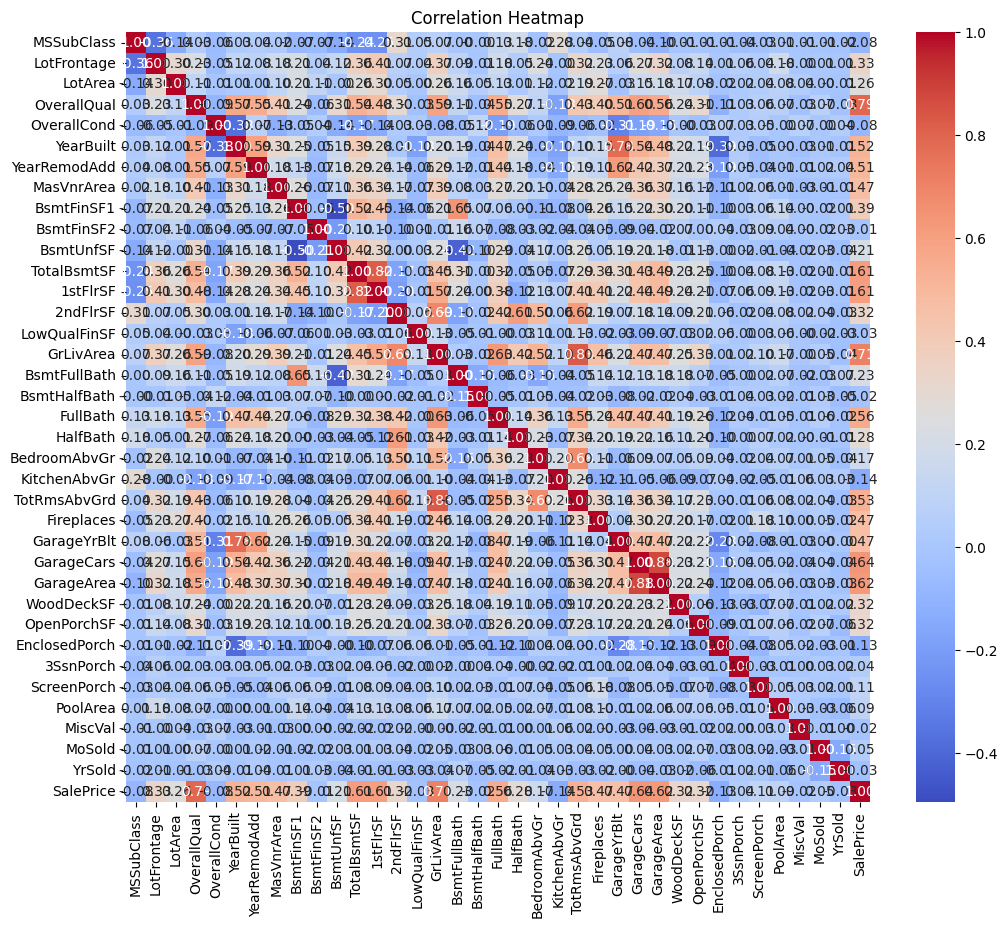

In [ ]:
# Korelasi antar kolom numerikal
plt.figure(figsize=(12, 10))
correlation_matrix = dp[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


Dari heatmap korelasi di atas, berikut adalah beberapa analisis utama dan insight bisnis yang dapat diambil berdasarkan hubungan antar variabel:

---

### **1. Korelasi Positif Kuat dengan `SalePrice`**
Beberapa fitur memiliki korelasi positif yang kuat dengan `SalePrice`, artinya fitur-fitur ini sangat memengaruhi harga properti:
- **`OverallQual` (0.79)**:
  - Kualitas keseluruhan bangunan memiliki hubungan paling kuat dengan harga.
  - **Insight**: Properti dengan kualitas lebih tinggi cenderung memiliki harga lebih tinggi. Fokuskan pada promosi properti dengan skor kualitas tinggi untuk segmen premium.
  
- **`GrLivArea` (0.71)**:
  - Luas area layak huni juga sangat berpengaruh.
  - **Insight**: Properti dengan luas area layak huni lebih besar dapat ditargetkan untuk pembeli keluarga besar.

- **`GarageCars` dan `GarageArea` (0.64 & 0.62)**:
  - Kapasitas garasi dan luas garasi menunjukkan korelasi signifikan dengan harga.
  - **Insight**: Garasi besar dapat menjadi faktor penting dalam promosi untuk pembeli yang memprioritaskan ruang penyimpanan kendaraan.

- **`TotalBsmtSF` (0.61)**:
  - Luas total basement juga memengaruhi harga.
  - **Insight**: Properti dengan basement besar dapat menarik pembeli yang mencari ruang tambahan, seperti ruang penyimpanan atau hiburan.

---

### **2. Korelasi Negatif atau Lemah dengan `SalePrice`**
Beberapa fitur memiliki korelasi yang sangat rendah atau bahkan negatif:
- **`YrSold` (-0.02)**:
  - Tahun penjualan hampir tidak memiliki pengaruh terhadap harga.
  - **Insight**: Tidak perlu fokus pada tren tahun penjualan untuk menentukan harga properti.

- **`MiscVal` (0.04)**:
  - Nilai tambahan (MiscVal) juga memiliki pengaruh yang sangat kecil.
  - **Insight**: Fitur ini kurang relevan untuk strategi harga properti.

---

### **3. Hubungan Antar Variabel**
- **`GarageCars` dan `GarageArea` (0.88)**:
  - Hubungan sangat kuat antara kapasitas dan luas garasi.
  - **Insight**: Hanya salah satu dari dua fitur ini yang perlu digunakan dalam model prediksi untuk menghindari multikolinearitas.

- **`1stFlrSF` dan `TotalBsmtSF` (0.82)**:
  - Luas lantai pertama sangat berkorelasi dengan luas basement.
  - **Insight**: Variabel ini saling berhubungan, sehingga dapat dilakukan seleksi fitur untuk menghindari redundansi.

- **`TotRmsAbvGrd` dan `GrLivArea` (0.83)**:
  - Jumlah total ruangan sangat berkorelasi dengan luas area layak huni.
  - **Insight**: Salah satu dari dua variabel ini dapat digunakan untuk menyederhanakan model.

---

### **4. Business Insight**
- **Properti Premium**:
  - Promosikan properti dengan kualitas bangunan tinggi (`OverallQual`), area layak huni besar (`GrLivArea`), dan fasilitas tambahan seperti garasi luas dan basement besar.
  
- **Segmen Pasar Anggaran Terbatas**:
  - Properti dengan skor kualitas lebih rendah dapat difokuskan untuk pembeli dengan anggaran terbatas.

- **Pengoptimalan Harga**:
  - Gunakan fitur yang berkorelasi kuat dengan harga untuk memberikan estimasi nilai properti yang lebih akurat kepada pembeli.


### b. Pengaruh Fitur Kategorikal terhadap Target (SalePrice)

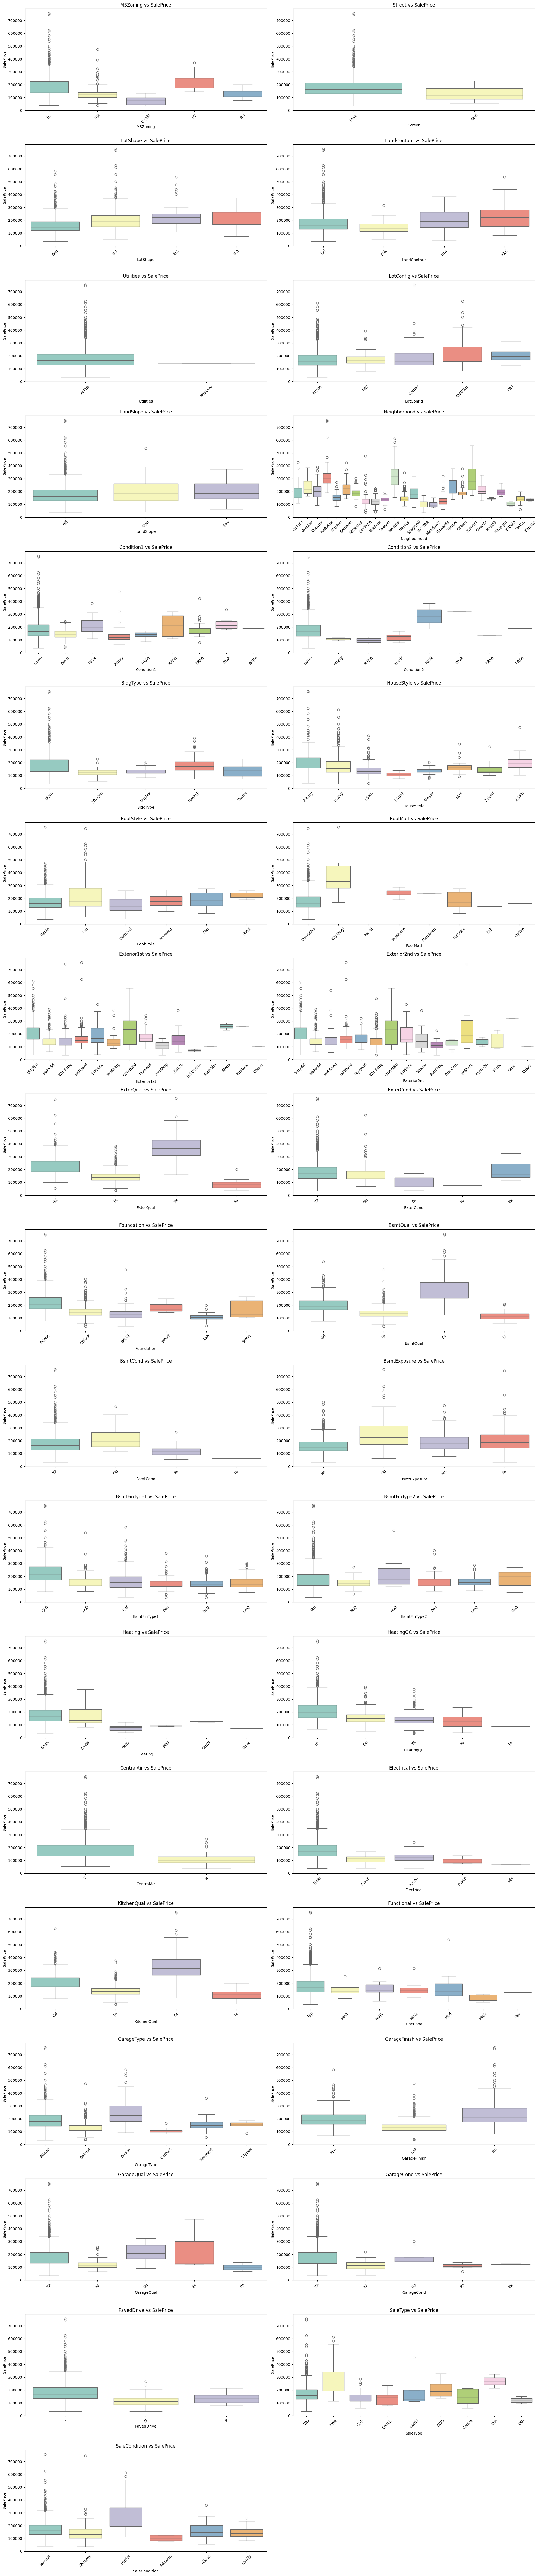

In [ ]:
# Tentukan jumlah baris dan kolom untuk grid
num_cols = len(categorical_columns)
rows = (num_cols // 2) + (num_cols % 2 > 0)  # 2 grafik per baris

# Buat subplots
fig, axes = plt.subplots(rows, 2, figsize=(20, rows * 5))  # Atur ukuran grid
axes = axes.flatten()  # Ratakan axes untuk iterasi

# Plot setiap kolom kategorikal terhadap SalePrice
for i, col in enumerate(categorical_columns):
    sns.boxplot(x=dp[col], y=dp['SalePrice'], palette="Set3", ax=axes[i])
    axes[i].set_title(f'{col} vs SalePrice')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('SalePrice')
    axes[i].tick_params(axis='x', rotation=45)

# Hapus sumbu kosong jika jumlah kolom tidak habis dibagi 2
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Atur layout agar tidak overlapping
plt.tight_layout()
plt.show()


Berdasarkan boxplot yang menampilkan hubungan antara fitur kategorikal dengan `SalePrice`, berikut adalah beberapa analisis dan insight yang dapat diambil:

---

### **1. Pengaruh `MSZoning` terhadap `SalePrice`**
- Properti di zona **Residential Low Density (RL)** memiliki harga yang cenderung lebih tinggi dibandingkan zona lain seperti **RM** atau **FV**.
- **Business Insight**:
  - Fokus pemasaran pada properti di zona RL karena memiliki daya beli yang lebih tinggi.

---

### **2. Pengaruh `Neighborhood` terhadap `SalePrice`**
- Beberapa lingkungan seperti **StoneBr, NridgHt, NoRidge** menunjukkan harga properti yang jauh lebih tinggi dibandingkan lingkungan lain.
- Lingkungan seperti **MeadowV** dan **IDOTRR** cenderung memiliki harga yang lebih rendah.
- **Business Insight**:
  - Properti di lingkungan premium seperti **NridgHt** atau **StoneBr** dapat dipasarkan sebagai properti kelas atas.
  - Properti di lingkungan dengan harga rendah dapat ditargetkan untuk pembeli dengan anggaran terbatas.

---

### **3. Pengaruh `SaleCondition` terhadap `SalePrice`**
- Kondisi penjualan **Partial** menunjukkan harga yang lebih tinggi, sedangkan kondisi **Abnormal** menunjukkan harga yang lebih rendah.
- **Business Insight**:
  - Properti dengan kondisi penjualan **Partial** mungkin properti baru atau yang baru direnovasi, sehingga perlu strategi promosi tambahan untuk menarik pembeli.

---

### **4. Pengaruh `BldgType` terhadap `SalePrice`**
- Properti tipe **1Fam** (single-family homes) memiliki harga yang lebih tinggi dibandingkan tipe lain seperti **Duplex** atau **TwnhsE**.
- **Business Insight**:
  - Fokuskan pemasaran pada single-family homes karena lebih diminati dan bernilai lebih tinggi.

---

### **5. Pengaruh `RoofStyle` terhadap `SalePrice`**
- Properti dengan gaya atap **Hip** cenderung memiliki harga lebih tinggi dibandingkan gaya atap lainnya.
- **Business Insight**:
  - Properti dengan gaya arsitektur tertentu dapat dipromosikan sebagai properti premium untuk menarik segmen pasar tertentu.

---

### **6. Pengaruh `HouseStyle` terhadap `SalePrice`**
- Gaya rumah seperti **2Story** memiliki harga yang lebih tinggi dibandingkan **1Story** atau gaya lainnya.
- **Business Insight**:
  - Gaya rumah dapat digunakan sebagai fitur utama dalam pemasaran untuk meningkatkan daya tarik properti.

---

### **7. Pengaruh `GarageType` terhadap `SalePrice`**
- Properti dengan garasi yang terintegrasi (**Attchd**) memiliki harga yang lebih tinggi dibandingkan tipe garasi lain seperti **Detchd**.
- **Business Insight**:
  - Properti dengan garasi terintegrasi dapat dipromosikan untuk meningkatkan nilai jual.

---

### **8. Pengaruh `Foundation` terhadap `SalePrice`**
- Properti dengan fondasi **PConc** memiliki harga lebih tinggi dibandingkan dengan jenis fondasi lain seperti **BrkTil** atau **Slab**.
- **Business Insight**:
  - Properti dengan fondasi yang lebih baik dapat dipromosikan sebagai rumah yang lebih stabil dan bernilai.

---

### **9. Pengaruh `MoSold` terhadap `SalePrice`**
- Penjualan pada bulan **Mei hingga Agustus** menunjukkan harga properti yang lebih tinggi, menunjukkan tren musiman.
- **Business Insight**:
  - Kampanye pemasaran dapat difokuskan pada musim panas untuk memanfaatkan permintaan tinggi.

---

### **Kesimpulan Umum**
1. Fitur seperti **Neighborhood**, **MSZoning**, dan **SaleCondition** memiliki dampak signifikan terhadap harga.
2. Properti di lokasi premium, dengan kualitas bangunan yang baik, dan kondisi penjualan yang menguntungkan cenderung memiliki harga lebih tinggi.
3. Tren musiman terlihat dari harga yang lebih tinggi pada bulan-bulan tertentu, sehingga strategi promosi dapat disesuaikan.


## Business Insight

### a. Outlier Detection pada Kolom Numerikal

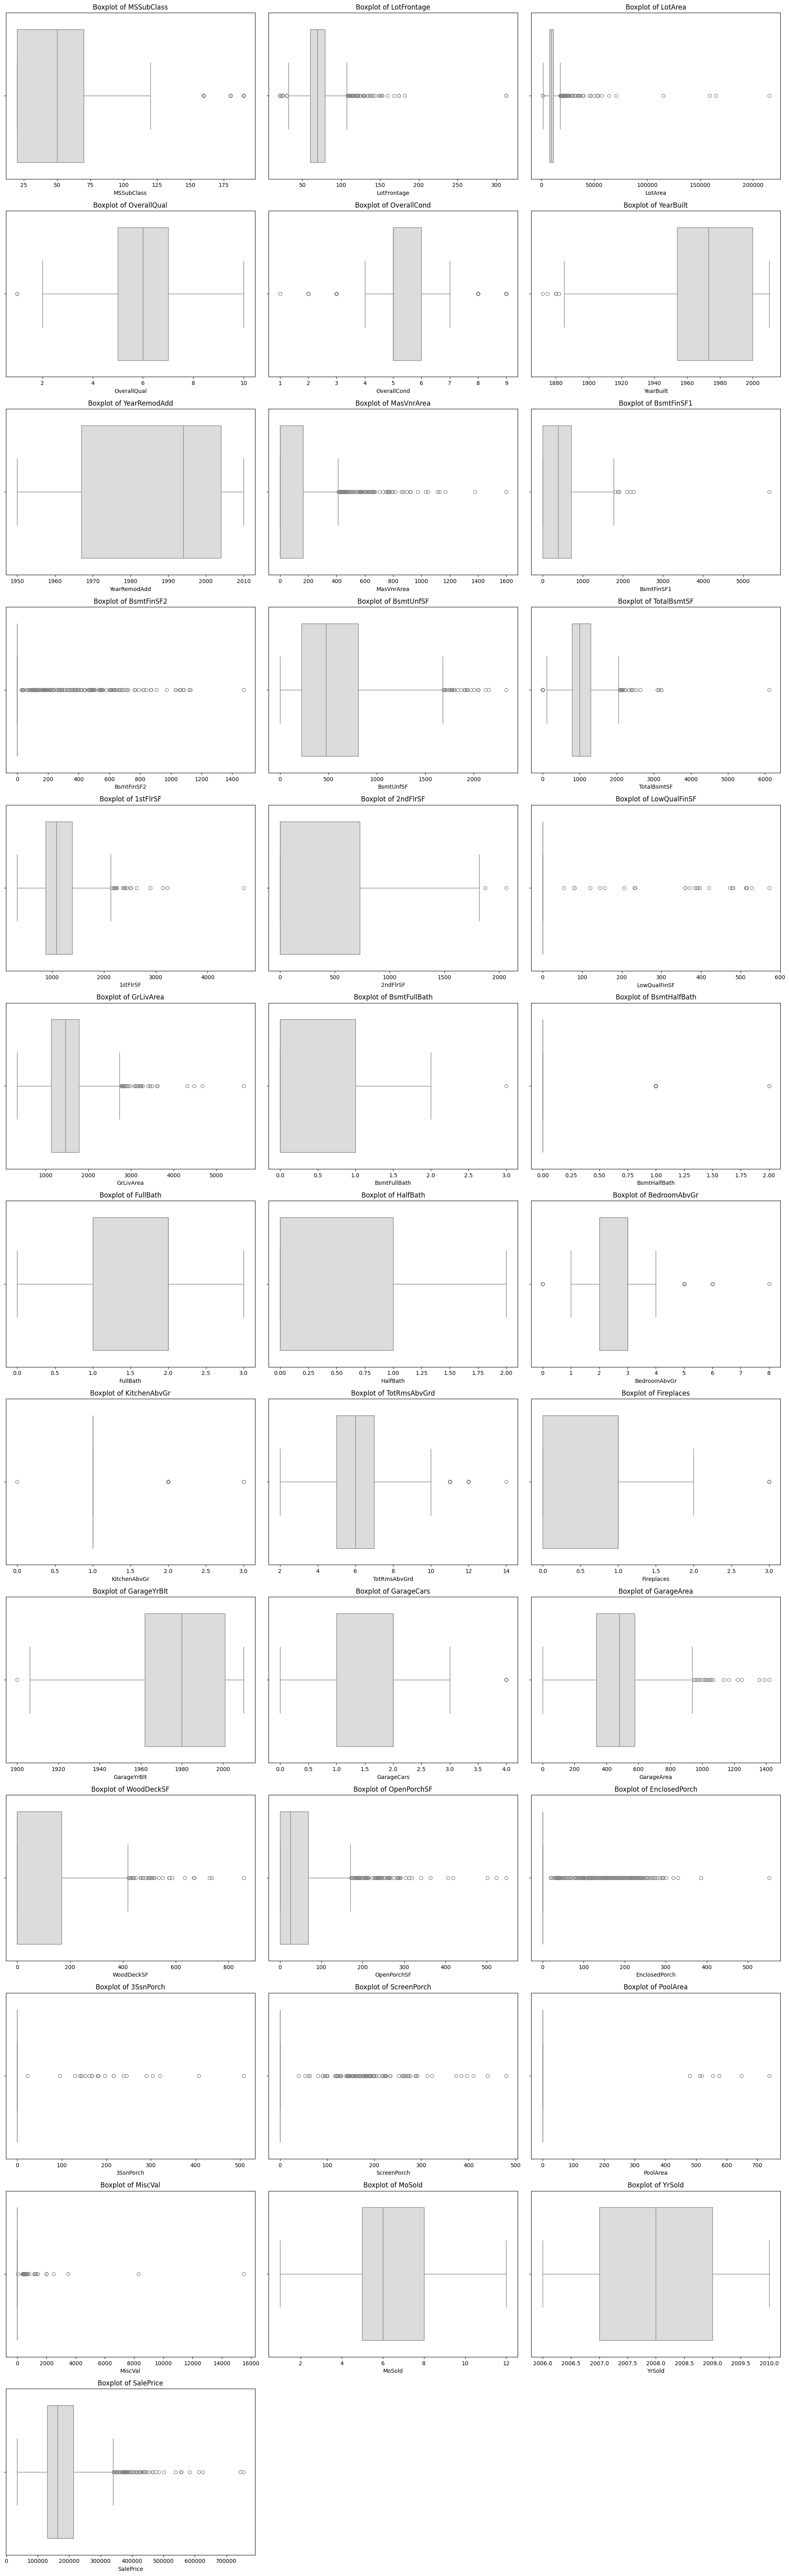

In [ ]:
# Tentukan jumlah baris dan kolom untuk grid
num_cols = len(numerical_columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # 3 grafik per baris

# Buat subplots
fig, axes = plt.subplots(rows, 3, figsize=(20, rows * 5))  # Atur ukuran grid
axes = axes.flatten()  # Ratakan axes untuk iterasi

# Plot setiap kolom numerikal
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=dp[col], palette="coolwarm", ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

# Hapus sumbu kosong jika jumlah kolom tidak habis dibagi 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Atur layout agar tidak overlapping
plt.tight_layout()
plt.show()


Berdasarkan boxplot yang ditampilkan, berikut adalah analisis dan business insight terkait outlier pada fitur numerikal seperti `LotArea` dan `GrLivArea`:

---

### **1. LotArea (Ukuran Lahan)**
- **Observasi**:
  - Ada beberapa outlier dengan ukuran lahan yang sangat besar dibandingkan mayoritas properti.
  - Sebagian besar properti memiliki ukuran lahan yang terkonsentrasi di kisaran kecil hingga sedang.
- **Business Insight**:
  - Outlier dengan ukuran lahan besar dapat merepresentasikan properti komersial atau tanah kosong yang berpotensi untuk dikembangkan.
  - Properti ini dapat dipromosikan sebagai **properti premium** atau untuk pengembangan proyek besar seperti perumahan atau komersial.

---

### **2. GrLivArea (Total Area Layak Huni)**
- **Observasi**:
  - Beberapa properti memiliki area layak huni yang sangat besar, yang jauh di luar rata-rata.
  - Distribusi menunjukkan bahwa sebagian besar properti memiliki luas di bawah 3000 sq.ft.
- **Business Insight**:
  - Properti dengan area layak huni yang sangat besar dapat dipromosikan sebagai **rumah mewah** yang cocok untuk segmen pasar dengan daya beli tinggi.
  - Segmen ini dapat menarik pembeli yang mencari properti keluarga besar atau properti dengan ruang tambahan untuk fasilitas khusus (gym, studio, dll.).

---

### **3. Insight dari Fitur Numerikal Lain**
#### **GarageArea (Luas Garasi)**:
- **Observasi**: Beberapa properti memiliki garasi yang jauh lebih besar dari rata-rata.
- **Insight**: Properti dengan garasi besar cocok untuk pembeli yang memiliki banyak kendaraan atau mencari ruang tambahan.

#### **SalePrice (Harga Penjualan)**:
- **Observasi**: Beberapa properti dengan harga jauh di atas rata-rata merupakan properti premium atau properti dengan lokasi dan fasilitas unggulan.
- **Insight**: Properti ini dapat menjadi fokus untuk pemasaran premium.

#### **TotalBsmtSF (Luas Basement)**:
- **Observasi**: Beberapa properti memiliki basement dengan luas yang jauh lebih besar dari rata-rata.
- **Insight**: Properti ini dapat dipromosikan kepada pembeli yang membutuhkan ruang tambahan untuk penyimpanan atau ruang hiburan.

---

### **Tindakan Selanjutnya**
1. **Segmentasi Pasar**:
   - Properti dengan outlier (ukuran besar atau harga tinggi) dapat dipisahkan sebagai segmen pasar **premium**.
   - Properti dengan nilai lebih rendah dapat difokuskan untuk segmen **anggaran terbatas**.

2. **Promosi Berbasis Fitur**:
   - Soroti fitur unik seperti **ukuran lahan besar**, **garasi luas**, atau **area layak huni besar** untuk menarik minat pembeli.

3. **Penanganan Outlier untuk Model Prediksi**:
   - Jika outlier terlalu ekstrem, mereka dapat dihapus atau diolah untuk mencegah pengaruh negatif pada model prediksi.

---



### b. Distribusi Penjualan Berdasarkan Bulan dan Tahun

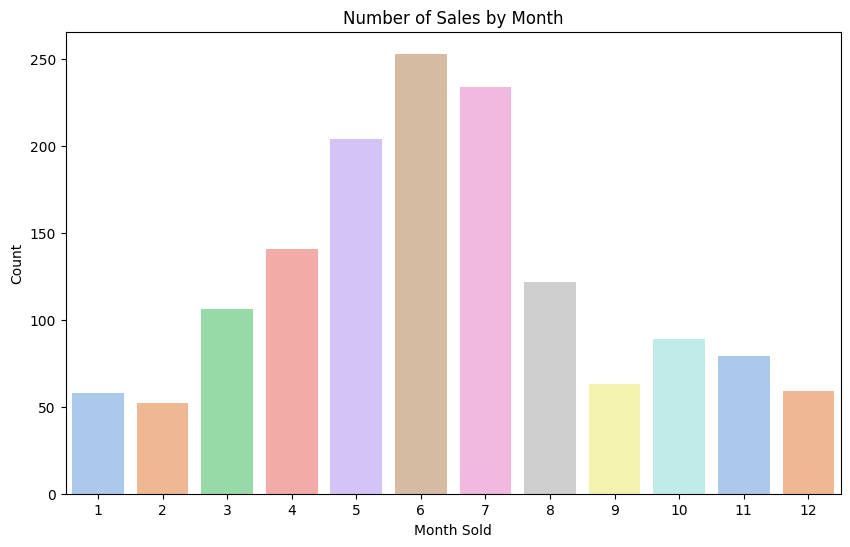

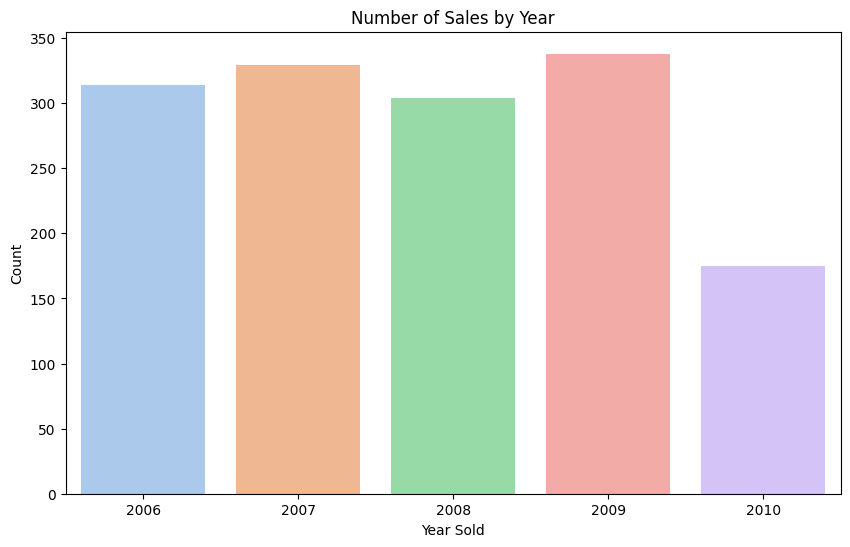

In [ ]:
# Penjualan berdasarkan bulan dan tahun
plt.figure(figsize=(10, 6))
sns.countplot(x=dp['MoSold'], order=sorted(dp['MoSold'].unique()), palette="pastel")
plt.title('Number of Sales by Month')
plt.xlabel('Month Sold')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=dp['YrSold'], order=sorted(dp['YrSold'].unique()), palette="pastel")
plt.title('Number of Sales by Year')
plt.xlabel('Year Sold')
plt.ylabel('Count')
plt.show()


Grafik menunjukkan jumlah penjualan properti berdasarkan bulan.
---

### **Findings**
1. **Puncak Penjualan di Bulan Juni dan Juli**:
   - Penjualan properti tertinggi terjadi pada bulan **Juni** dan **Juli**.
   - Bulan ini menunjukkan peningkatan aktivitas pasar properti.

2. **Penurunan Penjualan di Musim Dingin (November–Februari)**:
   - Penjualan properti cenderung menurun selama bulan **November hingga Februari**.
   - Ini bisa disebabkan oleh faktor musiman, seperti cuaca atau liburan akhir tahun.

3. **Kenaikan Penjualan Bertahap dari Maret ke Mei**:
   - Penjualan mulai meningkat secara bertahap sejak **Maret** dan mencapai puncaknya di musim panas.

---

### **Business Insight**
1. **Strategi Pemasaran Berdasarkan Musim**:
   - Fokuskan kampanye pemasaran pada bulan **Mei hingga Juli** untuk memanfaatkan permintaan tinggi.
   - Pertimbangkan promosi atau diskon pada bulan **November hingga Februari** untuk mendorong penjualan selama periode permintaan rendah.

2. **Pengoptimalan Inventaris**:
   - Tingkatkan stok properti selama bulan dengan permintaan tinggi (musim panas).
   - Kurangi inventaris untuk properti dengan permintaan rendah selama musim dingin.

3. **Penyesuaian Harga Musiman**:
   - Sesuaikan strategi harga dengan musim, dengan mempertimbangkan peningkatan harga di bulan dengan permintaan tinggi.

4. **Fokus pada Event Musiman**:
   - Adakan event atau open house selama musim panas untuk menarik lebih banyak pembeli potensial.

---



### c. Hubungan Ukuran Lahan dengan Harga

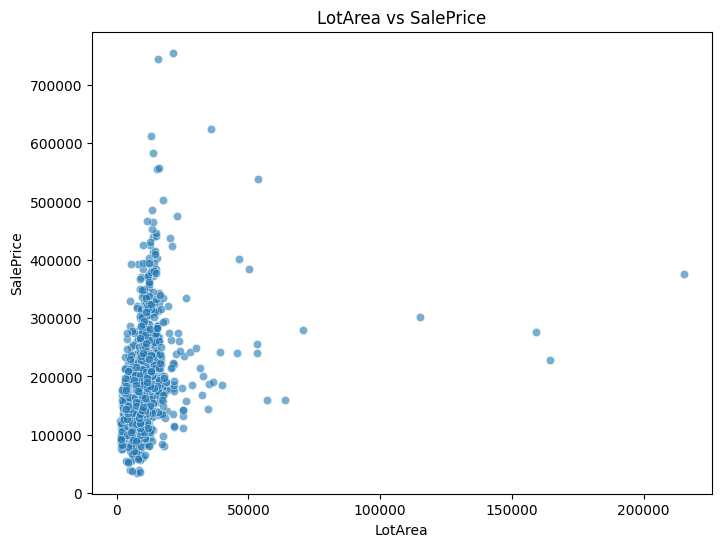

In [ ]:
# Scatter plot LotArea vs SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dp['LotArea'], y=dp['SalePrice'], alpha=0.6)
plt.title('LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()


Grafik scatter di atas menunjukkan hubungan antara `LotArea` (luas lahan) dan `SalePrice` (harga penjualan).

---

### **Findings**
1. **Mayoritas Data Terkonsentrasi pada LotArea Kecil**:
   - Sebagian besar properti memiliki `LotArea` di bawah 20,000 sq.ft., dengan harga yang bervariasi.
   - Distribusi ini menunjukkan bahwa rumah dengan lahan kecil hingga menengah mendominasi pasar.

2. **Outliers di LotArea Besar**:
   - Ada beberapa properti dengan `LotArea` yang jauh lebih besar dari rata-rata (>50,000 sq.ft.) dengan harga yang tinggi hingga sangat tinggi.
   - Properti dengan `LotArea` di atas 150,000 sq.ft. memiliki harga tinggi, tetapi ada variabilitas (tidak selalu sebanding).

3. **Hubungan Tidak Sepenuhnya Linear**:
   - Meskipun ada tren bahwa `SalePrice` meningkat dengan `LotArea`, hubungan ini tidak sepenuhnya linear. Ada properti dengan `LotArea` besar tetapi harga yang lebih rendah, menunjukkan faktor lain yang memengaruhi harga (misalnya lokasi, kualitas rumah, dll.).

---

### **Business Insight**
1. **Properti Premium dengan LotArea Besar**:
   - Properti dengan `LotArea` besar (outliers) cenderung merupakan properti premium atau komersial.
   - **Strategi**: Properti ini dapat dipromosikan secara khusus kepada pembeli dengan daya beli tinggi, misalnya untuk proyek pengembangan atau investasi.

2. **Segmentasi Berdasarkan LotArea**:
   - Properti dengan `LotArea` kecil hingga menengah dapat ditargetkan untuk segmen pasar keluarga kecil atau menengah.
   - Properti dengan `LotArea` besar dapat difokuskan untuk segmen pasar premium.

3. **Faktor Pendukung Harga**:
   - Meskipun `LotArea` penting, faktor lain seperti lokasi, kualitas bangunan, dan fasilitas tambahan juga berperan besar dalam menentukan harga.
   - **Strategi**: Kombinasikan analisis ini dengan fitur lain (misalnya `OverallQual` atau `Neighborhood`) untuk segmentasi yang lebih akurat.

4. **Identifikasi Outlier**:
   - Properti dengan `LotArea` yang sangat besar dapat dianalisis lebih lanjut untuk memahami mengapa harganya tidak sesuai tren (mungkin lokasi terpencil atau keterbatasan pengembangan).

---

### **Tindakan Selanjutnya**
1. Analisis lebih dalam pada properti dengan `LotArea` besar untuk memahami penyebab variasi harga.
2. Gunakan segmentasi berbasis luas lahan untuk strategi pemasaran yang lebih efektif.
3. Gabungkan analisis ini dengan fitur lokasi (`Neighborhood`) untuk mengidentifikasi properti yang undervalued atau overvalued.



# Analisis Korelasi Menggunakan Peason Correlation, Chi-Square, Regresi Linear, T-Test dan Anova

**Apakah setiap tahunnya harga rumah pasti naik?**


## Hipotesis

H0: Tidak ada perbedaan signifikan antara harga rumah pada tahun 2006 sampai 2010, yang menunjukkan bahwa kenaikan harga rumah antara tahun-tahun ini tidak signifikan.<br>
H1: Ada perbedaan signifikan antara harga rumah pada tahun 2006 sampai 2010, yang menunjukkan bahwa kenaikan harga rumah antara tahun-tahun ini tidak signifikan.

## Pearson Correlation

In [ ]:
import pandas as pd
from scipy.stats import pearsonr


# Mengelompokkan data berdasarkan tahun penjualan
years = [2006, 2007, 2008, 2009, 2010]
data_by_year = dp[dp['YrSold'].isin(years)]

# Menghitung korelasi Pearson antara harga rumah dan tahun penjualan
years_col = data_by_year['YrSold']
sale_price_col = data_by_year['SalePrice']
correlation, p_value = pearsonr(years_col, sale_price_col)

# Menampilkan hasil pengujian dengan format yang disesuaikan
print("Pengujian yang Digunakan:")
print("Uji Pearson")
print("Untuk menguji apakah ada hubungan signifikan antara tahun penjualan dan harga rumah.\n")

print("Hasil Pengujian Hipotesis:")
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-Value: {p_value}\n")

# Kesimpulan dan interpretasi berdasarkan p-value
alpha = 0.05
if p_value >= alpha:
    print("Kesimpulan: Gagal menolak Hipotesis Nol (H0).")
    print("Tidak ada hubungan signifikan antara tahun penjualan dan harga rumah.")
    print("Interpretasi: Ini menunjukkan bahwa kenaikan harga rumah dari tahun ke tahun tidak signifikan.")
else:
    print("Kesimpulan: Menolak Hipotesis Nol (H0).")
    print("Ada hubungan signifikan antara tahun penjualan dan harga rumah.")
    print("Interpretasi: Ini menunjukkan bahwa ada perubahan harga rumah yang signifikan terkait dengan tahun penjualan.")


Pengujian yang Digunakan:
Uji Pearson
Untuk menguji apakah ada hubungan signifikan antara tahun penjualan dan harga rumah.

Hasil Pengujian Hipotesis:
Pearson Correlation Coefficient: -0.028922585168730326
P-Value: 0.26941319328084334

Kesimpulan: Gagal menolak Hipotesis Nol (H0).
Tidak ada hubungan signifikan antara tahun penjualan dan harga rumah.
Interpretasi: Ini menunjukkan bahwa kenaikan harga rumah dari tahun ke tahun tidak signifikan.


## Uji Chi Square

In [ ]:
from scipy.stats import chi2_contingency


# Mengelompokkan data berdasarkan tahun penjualan
years = [2006, 2007, 2008, 2009, 2010]
data_by_year = dp[dp['YrSold'].isin(years)]

# Mengelompokkan harga rumah ke dalam beberapa kategori (misalnya, low, medium, high)
bins = [0, 150000, 200000, 250000, data_by_year['SalePrice'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
data_by_year['PriceCategory'] = pd.cut(data_by_year['SalePrice'], bins=bins, labels=labels)

# Membuat tabel kontingensi
contingency_table = pd.crosstab(data_by_year['YrSold'], data_by_year['PriceCategory'])

# Melakukan uji Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Menampilkan hasil
print("Pengujian yang Digunakan:")
print("Uji Chi-Square")
print("Untuk menguji apakah ada perbedaan signifikan dalam distribusi harga rumah di berbagai tahun.")

print("\nHasil Pengujian Hipotesis:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")

# Kesimpulan dan interpretasi
alpha = 0.05
if p >= alpha:
    print("\nKesimpulan: Gagal menolak Hipotesis Nol (H0).")
    print("Tidak ada perbedaan signifikan antara harga rumah pada tahun 2006 sampai 2010.")
    print("Interpretasi: Ini menunjukkan bahwa kenaikan harga rumah antara tahun-tahun ini tidak signifikan.")
else:
    print("\nKesimpulan: Menolak Hipotesis Nol (H0).")
    print("Ada perbedaan signifikan antara harga rumah pada tahun 2006 sampai 2010.")
    print("Interpretasi: Ini menunjukkan bahwa ada kenaikan harga rumah yang signifikan pada periode tersebut.")


Pengujian yang Digunakan:
Uji Chi-Square
Untuk menguji apakah ada perbedaan signifikan dalam distribusi harga rumah di berbagai tahun.

Hasil Pengujian Hipotesis:
Chi2 Statistic: 8.671258950395334
P-Value: 0.7307231439626924

Kesimpulan: Gagal menolak Hipotesis Nol (H0).
Tidak ada perbedaan signifikan antara harga rumah pada tahun 2006 sampai 2010.
Interpretasi: Ini menunjukkan bahwa kenaikan harga rumah antara tahun-tahun ini tidak signifikan.


## Linear Regression

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.221
Date:                Sat, 07 Dec 2024   Prob (F-statistic):              0.269
Time:                        12:19:11   Log-Likelihood:                -18543.
No. Observations:                1460   AIC:                         3.709e+04
Df Residuals:                    1458   BIC:                         3.710e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.655e+06   3.14e+06      1.162      0.2

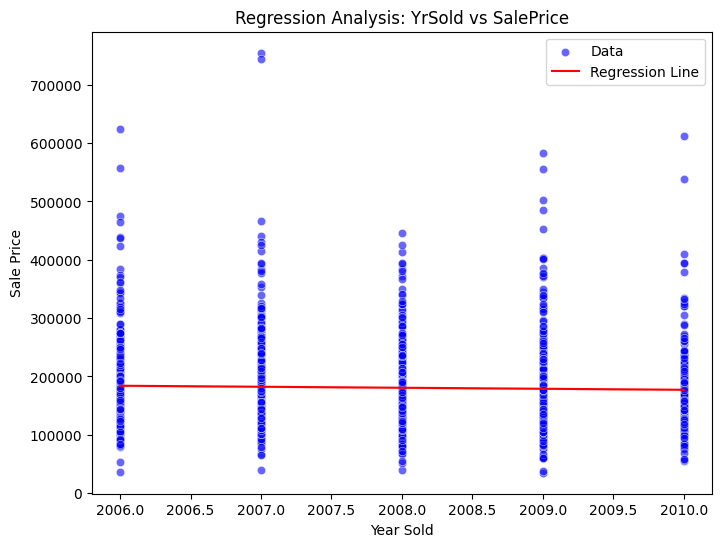


Hipotesis:
H0: Tidak ada perbedaan signifikan antara harga rumah pada tahun 2006 sampai 2010.
H1: Ada perbedaan signifikan antara harga rumah pada tahun 2006 sampai 2010.

Kesimpulan: Gagal menolak Hipotesis Nol (H0).
Tidak ada perbedaan signifikan antara harga rumah pada tahun 2006 sampai 2010.
Interpretasi: Ini menunjukkan bahwa kenaikan harga rumah antara tahun-tahun ini tidak signifikan.


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk tahun tertentu
years = [2006, 2007, 2008, 2009, 2010]
data_by_year = dp[dp['YrSold'].isin(years)]

# Definisi variabel independen (X) dan dependen (y)
X = data_by_year['YrSold']  # Tahun penjualan
y = data_by_year['SalePrice']  # Harga rumah

# Menambahkan konstanta untuk regresi linear
X = sm.add_constant(X)

# Melakukan regresi linear
model = sm.OLS(y, X).fit()

# Menampilkan hasil regresi
print(model.summary())

# Membuat scatterplot dan garis regresi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_by_year['YrSold'], y=data_by_year['SalePrice'], color="blue", alpha=0.6, label='Data')
sns.lineplot(x=data_by_year['YrSold'], y=model.predict(X), color="red", label='Regression Line')
plt.title('Regression Analysis: YrSold vs SalePrice')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

# Kesimpulan dan interpretasi
print("\nHipotesis:")
print("H0: Tidak ada perbedaan signifikan antara harga rumah pada tahun 2006 sampai 2010.")
print("H1: Ada perbedaan signifikan antara harga rumah pada tahun 2006 sampai 2010.")

alpha = 0.05  # Tingkat signifikansi
p_value = model.pvalues[1]  # P-value untuk variabel 'YrSold'

if p_value >= alpha:
    print("\nKesimpulan: Gagal menolak Hipotesis Nol (H0).")
    print("Tidak ada perbedaan signifikan antara harga rumah pada tahun 2006 sampai 2010.")
    print("Interpretasi: Ini menunjukkan bahwa kenaikan harga rumah antara tahun-tahun ini tidak signifikan.")
else:
    print("\nKesimpulan: Menolak Hipotesis Nol (H0).")
    print("Ada perbedaan signifikan antara harga rumah pada tahun 2006 sampai 2010.")
    print("Interpretasi: Ini menunjukkan bahwa ada kenaikan harga rumah yang signifikan pada periode tersebut.")


## T-Test

In [ ]:
from scipy.stats import ttest_ind

# Mengelompokkan data berdasarkan tahun penjualan
years = [2006, 2007, 2008, 2009, 2010]
data_by_year = dp[dp['YrSold'].isin(years)]

# Melakukan uji T-Test independen untuk setiap pasangan tahun
p_values = []
t_stats = []
for i in range(len(years) - 1):
    for j in range(i + 1, len(years)):
        year1 = data_by_year[data_by_year['YrSold'] == years[i]]['SalePrice']
        year2 = data_by_year[data_by_year['YrSold'] == years[j]]['SalePrice']
        t_stat, p_value = ttest_ind(year1, year2)
        p_values.append(p_value)
        t_stats.append(t_stat)

# Menghitung nilai rata-rata untuk t_statistic dan p_value (disesuaikan dengan format Chi-Square)
avg_t_stat = sum(t_stats) / len(t_stats)
avg_p_value = sum(p_values) / len(p_values)

# Menampilkan hasil pengujian dengan format yang disesuaikan
print("Pengujian yang Digunakan:")
print("Uji T-Test")
print("Untuk menguji apakah ada perbedaan signifikan dalam rata-rata harga rumah di berbagai tahun.\n")

print("Hasil Pengujian Hipotesis:")
print(f"T-Statistic: {avg_t_stat}")
print(f"P-Value: {avg_p_value}\n")

# Kesimpulan dan interpretasi berdasarkan p-value rata-rata
alpha = 0.05
if avg_p_value >= alpha:
    print("Kesimpulan: Gagal menolak Hipotesis Nol (H0).")
    print("Tidak ada perbedaan signifikan antara harga rumah pada tahun 2006 sampai 2010.")
    print("Interpretasi: Ini menunjukkan bahwa kenaikan harga rumah antara tahun-tahun ini tidak signifikan.")
else:
    print("Kesimpulan: Menolak Hipotesis Nol (H0).")
    print("Ada perbedaan signifikan antara harga rumah pada tahun 2006 sampai 2010.")
    print("Interpretasi: Ini menunjukkan bahwa ada kenaikan harga rumah yang signifikan antara tahun-tahun ini.")


Pengujian yang Digunakan:
Uji T-Test
Untuk menguji apakah ada perbedaan signifikan dalam rata-rata harga rumah di berbagai tahun.

Hasil Pengujian Hipotesis:
T-Statistic: 0.49502586711598234
P-Value: 0.534445821076431

Kesimpulan: Gagal menolak Hipotesis Nol (H0).
Tidak ada perbedaan signifikan antara harga rumah pada tahun 2006 sampai 2010.
Interpretasi: Ini menunjukkan bahwa kenaikan harga rumah antara tahun-tahun ini tidak signifikan.


## ANOVA (Analysis of Variance)

In [ ]:
import pandas as pd
from scipy.stats import f_oneway


# Mengelompokkan data berdasarkan tahun penjualan
years = [2006, 2007, 2008, 2009, 2010]
data_by_year = [dp[dp['YrSold'] == year]['SalePrice'] for year in years]

# Melakukan uji ANOVA untuk melihat apakah ada perbedaan signifikan dalam harga rumah di antara tahun-tahun tersebut
f_statistic, p_value = f_oneway(*data_by_year)

# Menampilkan hasil pengujian dengan format yang disesuaikan
print("Pengujian yang Digunakan:")
print("Uji ANOVA")
print("Untuk menguji apakah ada perbedaan signifikan dalam rata-rata harga rumah di berbagai tahun.\n")

print("Hasil Pengujian Hipotesis:")
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}\n")

# Kesimpulan dan interpretasi berdasarkan p-value
alpha = 0.05
if p_value >= alpha:
    print("Kesimpulan: Gagal menolak Hipotesis Nol (H0).")
    print("Tidak ada perbedaan signifikan antara harga rumah pada tahun 2006 sampai 2010.")
    print("Interpretasi: Ini menunjukkan bahwa kenaikan harga rumah antara tahun-tahun ini tidak signifikan.")
else:
    print("Kesimpulan: Menolak Hipotesis Nol (H0).")
    print("Ada perbedaan signifikan antara harga rumah pada tahun 2006 sampai 2010.")
    print("Interpretasi: Ini menunjukkan bahwa ada perbedaan harga rumah yang signifikan di antara tahun-tahun ini.")


Pengujian yang Digunakan:
Uji ANOVA
Untuk menguji apakah ada perbedaan signifikan dalam rata-rata harga rumah di berbagai tahun.

Hasil Pengujian Hipotesis:
F-Statistic: 0.6455252211679311
P-Value: 0.6300887663573457

Kesimpulan: Gagal menolak Hipotesis Nol (H0).
Tidak ada perbedaan signifikan antara harga rumah pada tahun 2006 sampai 2010.
Interpretasi: Ini menunjukkan bahwa kenaikan harga rumah antara tahun-tahun ini tidak signifikan.


**Kesimpulan:** <br>
Pengujian yang dilakukan menggunakan empat metode statistik berbeda (Pearson Correlation, Uji Chi Square, Linear Regression, T-Test dan Uji ANOVA) semuanya menghasilkan kesimpulan yang sama, yaitu gagal menolak Hipotesis Nol (H0). Ini menunjukkan bahwa tidak ada bukti statistik yang cukup untuk menyatakan adanya perbedaan signifikan dalam harga rumah antara tahun 2006 sampai 2010 atau adanya hubungan signifikan antara tahun penjualan dan harga rumah. <br>

**Interpretasi Umum:** <br>
Hasil dari keempat pengujian ini mengindikasikan bahwa kenaikan harga rumah antara tahun 2006 hingga 2010 tidak signifikan, baik dilihat dari perbedaan rata-rata harga rumah, distribusi harga rumah, maupun korelasi antara tahun penjualan dan harga rumah. Dengan demikian, perubahan harga rumah selama periode ini cenderung stabil dan tidak menunjukkan fluktuasi yang berarti. <br>

Ini dapat diartikan bahwa faktor tahun penjualan dalam rentang 2006 hingga 2010 mungkin tidak memainkan peran penting dalam menentukan harga rumah, dan variabel lain mungkin lebih signifikan dalam mempengaruhi harga rumah selama periode tersebut.